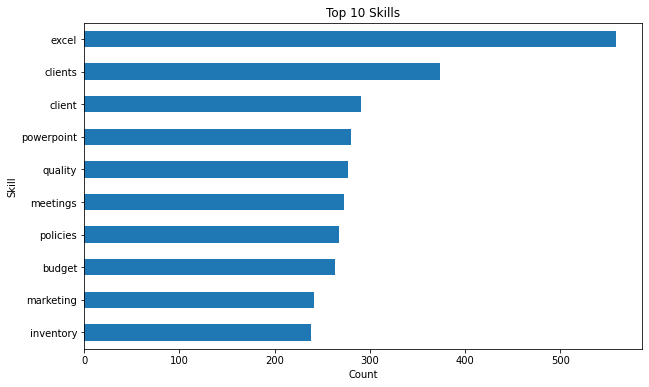

/var/folders/2s/1lsxqy313dsd322t1bqrq1q80000gn/T/ipykernel_6047/3538181456.py:55: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  community_service_counts = data.get('COMMUNITY_SERVICE', pd.Series([])).value_counts().head(5)


IndexError: index 0 is out of bounds for axis 0 with size 0

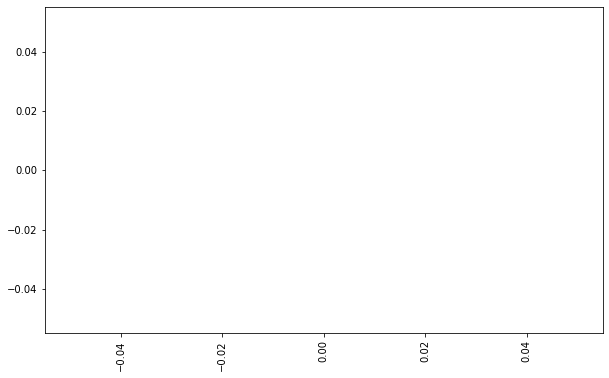

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def clean_skills(skills):
    """
    Clean the skills column by removing leading/trailing whitespace and special characters.

    Args:
        skills (str): Skills string.

    Returns:
        str: Cleaned skills string.
    """
    cleaned_skills = skills.strip().replace("'", "")
    return cleaned_skills


def analyze_resumes_data(data):
    """
    Analyze the resumes data and perform various insights.

    Args:
        data (DataFrame): Resumes data.

    Returns:
        dict: Dictionary containing the analyzed data.
    """
    analyzed_data = {}

    # Count the frequency of each skill
    data['SKILLS'] = data['SKILLS'].apply(clean_skills)
    skills_counts = data['SKILLS'].str.split(', ').explode().value_counts()
    analyzed_data['skills_counts'] = skills_counts

    # Convert skills to lowercase before counting frequencies
    skills_counts.index = skills_counts.index.str.lower()

    # Combine 'sales' and 'Sales' into a single category
    skills_counts['sales'] = skills_counts.get('sales', 0) + skills_counts.get('Sales', 0)
    skills_counts.drop(['sales', 'Sales'], inplace=True, errors='ignore')

    # Plot the top skills
    top_n = 10
    plt.figure(figsize=(10, 6))
    top_skills_counts = skills_counts.head(top_n)
    top_skills_counts.sort_values().plot(kind='barh')
    plt.title(f'Top {top_n} Skills')
    plt.xlabel('Count')
    plt.ylabel('Skill')
    plt.show()

    # Analyze the community service activities of applicants
    community_service_counts = data.get('COMMUNITY_SERVICE', pd.Series([])).value_counts().head(5)
    analyzed_data['community_service_counts'] = community_service_counts

    # Plot the top community service activities
    plt.figure(figsize=(10, 6))
    community_service_counts.plot(kind='bar')
    plt.title('Top Community Service Activities')
    plt.xlabel('Community Service Activity')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

    # Analyze the volunteering activities of applicants
    volunteering_counts = data.get('VOLUNTEERING', pd.Series([])).value_counts().head(5)
    analyzed_data['volunteering_counts'] = volunteering_counts

    # Plot the top volunteering activities
    plt.figure(figsize=(10, 6))
    volunteering_counts.plot(kind='bar')
    plt.title('Top Volunteering Activities')
    plt.xlabel('Volunteering Activity')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

    # Analyze the availability of driver's license
    driver_license_counts = data.get('DRIVERS_LICENSE_AVAILABILITY', pd.Series([])).value_counts()
    analyzed_data['driver_license_counts'] = driver_license_counts

    # Plot the driver's license availability
    plt.figure(figsize=(10, 6))
    driver_license_counts.plot(kind='bar')
    plt.title("Driver's License Availability")
    plt.xlabel('Availability')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

    return analyzed_data


if __name__ == '__main__':
    # Read the resumes data from a CSV file
    resumes_data = pd.read_csv('resumes_data.csv')

    # Analyze the resumes data
    analyzed_data = analyze_resumes_data(resumes_data)

    # Perform correlation analysis
    correlation_matrix = resumes_data[['EXPERIENCE_LENGTH', 'SKILLS_COUNT']].corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

    # Calculate descriptive statistics for numerical variables
    numeric_cols = ['EXPERIENCE_LENGTH', 'SKILLS_COUNT']
    numeric_stats = resumes_data[numeric_cols].describe()
    print(numeric_stats)

    # Create additional binary features
    resumes_data['AWARD_RECEIVED'] = resumes_data['AWARDS'].apply(lambda x: 1 if x != '[]' else 0)
    resumes_data['COMMUNITY_SERVICE_AVAILABLE'] = resumes_data['COMMUNITY_SERVICE'].apply(lambda x: 1 if x != '[]' else 0)
    resumes_data['VOLUNTEERING_AVAILABLE'] = resumes_data['VOLUNTEERING'].apply(lambda x: 1 if x != '[]' else 0)
    resumes_data['DRIVERS_LICENSE_AVAILABLE'] = resumes_data['DRIVERS_LICENSE_AVAILABILITY'].apply(
        lambda x: 1 if x == 'Yes' else 0
    )

    # Select features for modeling
    features = ['EXPERIENCE_LENGTH', 'SKILLS_COUNT', 'DRIVERS_LICENSE_AVAILABLE']


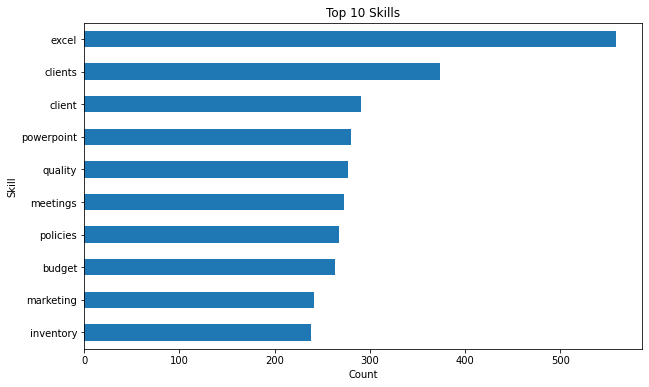

/var/folders/2s/1lsxqy313dsd322t1bqrq1q80000gn/T/ipykernel_6047/553938444.py:55: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  community_service_counts = data.get('COMMUNITY_SERVICE', pd.Series([])).value_counts().head(5)


IndexError: index 0 is out of bounds for axis 0 with size 0

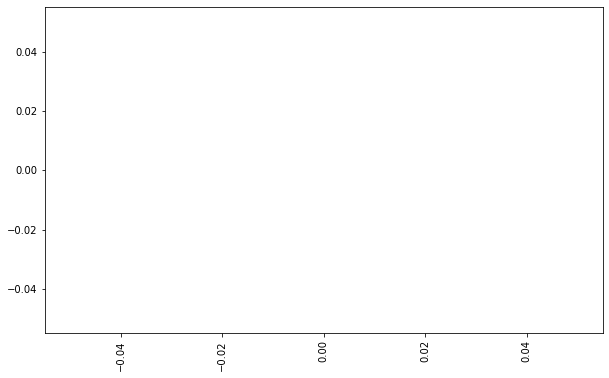

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def clean_skills(skills):
    """
    Clean the skills column by removing leading/trailing whitespace and special characters.

    Args:
        skills (str): Skills string.

    Returns:
        str: Cleaned skills string.
    """
    cleaned_skills = skills.strip().replace("'", "")
    return cleaned_skills


def analyze_resumes_data(data):
    """
    Analyze the resumes data and perform various insights.

    Args:
        data (DataFrame): Resumes data.

    Returns:
        dict: Dictionary containing the analyzed data.
    """
    analyzed_data = {}

    # Count the frequency of each skill
    data['SKILLS'] = data['SKILLS'].apply(clean_skills)
    skills_counts = data['SKILLS'].str.split(', ').explode().value_counts()
    analyzed_data['skills_counts'] = skills_counts

    # Convert skills to lowercase before counting frequencies
    skills_counts.index = skills_counts.index.str.lower()

    # Combine 'sales' and 'Sales' into a single category
    skills_counts['sales'] = skills_counts.get('sales', 0) + skills_counts.get('Sales', 0)
    skills_counts.drop(['sales', 'Sales'], inplace=True, errors='ignore')

    # Plot the top skills
    top_n = 10
    plt.figure(figsize=(10, 6))
    top_skills_counts = skills_counts.head(top_n)
    top_skills_counts.sort_values().plot(kind='barh')
    plt.title(f'Top {top_n} Skills')
    plt.xlabel('Count')
    plt.ylabel('Skill')
    plt.show()

    # Analyze the community service activities of applicants
    community_service_counts = data.get('COMMUNITY_SERVICE', pd.Series([])).value_counts().head(5)
    analyzed_data['community_service_counts'] = community_service_counts

    # Plot the top community service activities
    plt.figure(figsize=(10, 6))
    community_service_counts.plot(kind='bar')
    plt.title('Top Community Service Activities')
    plt.xlabel('Community Service Activity')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

    # Analyze the volunteering activities of applicants
    volunteering_counts = data.get('VOLUNTEERING', pd.Series([])).value_counts().head(5)
    analyzed_data['volunteering_counts'] = volunteering_counts

    # Plot the top volunteering activities
    plt.figure(figsize=(10, 6))
    volunteering_counts.plot(kind='bar')
    plt.title('Top Volunteering Activities')
    plt.xlabel('Volunteering Activity')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

    # Analyze the availability of driver's license
    driver_license_counts = data.get('DRIVERS_LICENSE_AVAILABILITY', pd.Series([])).value_counts()
    analyzed_data['driver_license_counts'] = driver_license_counts

    # Plot the driver's license availability
    plt.figure(figsize=(10, 6))
    driver_license_counts.plot(kind='bar')
    plt.title("Driver's License Availability")
    plt.xlabel('Availability')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

    return analyzed_data


if __name__ == '__main__':
    # Read the resumes data from a CSV file
    resumes_data = pd.read_csv('Ex_updated.csv')

    # Analyze the resumes data
    analyzed_data = analyze_resumes_data(resumes_data)

    # Perform correlation analysis
    correlation_matrix = resumes_data[['EXPERIENCE_LENGTH', 'SKILLS_COUNT']].corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

    # Calculate descriptive statistics for numerical variables
    numeric_cols = ['EXPERIENCE_LENGTH', 'SKILLS_COUNT']
    numeric_stats = resumes_data[numeric_cols].describe()
    print(numeric_stats)

    # Create additional binary features
    resumes_data['AWARD_RECEIVED'] = resumes_data['AWARDS'].apply(lambda x: 1 if x != '[]' else 0)
    resumes_data['COMMUNITY_SERVICE_AVAILABLE'] = resumes_data['COMMUNITY SERVICE'].apply(lambda x: 1 if x != '[]' else 0)
    resumes_data['VOLUNTEERING_AVAILABLE'] = resumes_data['VOLUNTEERING'].apply(lambda x: 1 if x != '[]' else 0)
    resumes_data['DRIVERS_LICENSE_AVAILABLE'] = resumes_data['DRIVERS_LICENSE_AVAILABILITY'].apply(
        lambda x: 1 if x == 'Yes' else 0
    )

    # Select features for modeling
    features = ['EXPERIENCE_LENGTH', 'SKILLS_COUNT', 'DRIVERS_LICENSE_AVAILABLE']
